### Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import *
import matplotlib.colors as mcolors
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import mannwhitneyu
import PyNonpar
from PyNonpar.twosample import wilcoxon_mann_whitney_test
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import ticker
import warnings

### Load data from the csv files into a DataFrames

In [2]:
CB_den1_before_compr_bouton = pd.read_csv('CB_den1_before_shrink_bouton.csv')
CB_den1_after_compr_bouton = pd.read_csv('CB_den1_after_shrink_bouton.csv')
CB_den2_before_compr_bouton = pd.read_csv('CB_den2_before_shrink_bouton.csv')
CB_den2_after_compr_bouton = pd.read_csv('CB_den2_after_shrink_bouton.csv')

CB_den1_before_compr_synapse = pd.read_csv('CB_den1_before_shrink_synapse.csv')
CB_den1_after_compr_synapse = pd.read_csv('CB_den1_after_shrink_synapse.csv')
CB_den2_before_compr_synapse = pd.read_csv('CB_den2_before_shrink_synapse.csv')
CB_den2_after_compr_synapse = pd.read_csv('CB_den2_after_shrink_synapse.csv')

CB_den1_before_compr_vesicle = pd.read_csv('CB_den1_before_shrink_vesicle.csv')
CB_den1_after_compr_vesicle = pd.read_csv('CB_den1_after_shrink_vesicle.csv')
CB_den2_before_compr_vesicle = pd.read_csv('CB_den2_before_shrink_vesicle.csv')
CB_den2_after_compr_vesicle = pd.read_csv('CB_den2_after_shrink_vesicle.csv')

### Reorganizing dataframes to prepare for statistical analysis

In [3]:
# 1. bouton_df
# Add a new column `dendrite_name_compr` for identification
CB_den1_before_compr_bouton['dendrite_name_compr'] = 'CB_den1_before'
CB_den1_after_compr_bouton['dendrite_name_compr'] = 'CB_den1_after'
CB_den2_before_compr_bouton['dendrite_name_compr'] = 'CB_den2_before'
CB_den2_after_compr_bouton['dendrite_name_compr'] = 'CB_den2_after'

# Concatenate all bouton tables
bouton_df = pd.concat([
    CB_den1_before_compr_bouton,
    CB_den1_after_compr_bouton,
    CB_den2_before_compr_bouton,
    CB_den2_after_compr_bouton
], ignore_index=True)

# 2. synapse_df
# Add a new column `dendrite_name_compr` for identification
CB_den1_before_compr_synapse['dendrite_name_compr'] = 'CB_den1_before'
CB_den1_after_compr_synapse['dendrite_name_compr'] = 'CB_den1_after'
CB_den2_before_compr_synapse['dendrite_name_compr'] = 'CB_den2_before'
CB_den2_after_compr_synapse['dendrite_name_compr'] = 'CB_den2_after'

# Concatenate all synapse tables
synapse_df = pd.concat([
    CB_den1_before_compr_synapse,
    CB_den1_after_compr_synapse,
    CB_den2_before_compr_synapse,
    CB_den2_after_compr_synapse
], ignore_index=True)

# 3. vesicle_df
# Add a new column `dendrite_name_compr` for identification
CB_den1_before_compr_vesicle['dendrite_name_compr'] = 'CB_den1_before'
CB_den1_after_compr_vesicle['dendrite_name_compr'] = 'CB_den1_after'
CB_den2_before_compr_vesicle['dendrite_name_compr'] = 'CB_den2_before'
CB_den2_after_compr_vesicle['dendrite_name_compr'] = 'CB_den2_after'

# Concatenate all vesicle tables
vesicle_df = pd.concat([
    CB_den1_before_compr_vesicle,
    CB_den1_after_compr_vesicle,
    CB_den2_before_compr_vesicle,
    CB_den2_after_compr_vesicle
], ignore_index=True)

In [36]:
bouton_df.head()

,bouton_number,location,comment,surface_area_micron^2,volume_micron^3,dendrite_name_compr
0,b1,shaft,NaN,2.19613,0.247041,CB_den1_before
1,b2,shaft,NaN,1.41760,0.103671,CB_den1_before
2,b3,shaft,NaN,1.67644,0.221581,CB_den1_before
3,b4,branch1,*partial,NaN,NaN,CB_den1_before
4,b5,shaft,NaN,2.25846,0.175338,CB_den1_before


In [4]:
bouton_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bouton_number          302 non-null    object 
 1   location               302 non-null    object 
 2   comment                12 non-null     object 
 3   surface_area_micron^2  288 non-null    float64
 4   volume_micron^3        288 non-null    float64
 5   dendrite_name_compr    302 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.3+ KB


In [5]:
synapse_df.head()

,bouton_number,synapse_number,surface_area_micron^2,distance_from_soma_micron,dendrite_name_compr
0,b1,as1,0.045538,4.57389,CB_den1_before
1,b2,as2,0.104090,4.99734,CB_den1_before
2,b3,as3,0.047073,6.57389,CB_den1_before
3,b4,ss1,NaN,NaN,CB_den1_before
4,b5,as4,0.183137,9.40735,CB_den1_before


In [6]:
synapse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bouton_number              302 non-null    object 
 1   synapse_number             302 non-null    object 
 2   surface_area_micron^2      288 non-null    float64
 3   distance_from_soma_micron  288 non-null    float64
 4   dendrite_name_compr        302 non-null    object 
dtypes: float64(2), object(3)
memory usage: 11.9+ KB


In [7]:
vesicle_df.head()

,bouton_number,synapse_type,vesicle_area_micron^2,form_factor,nearest_neighbour_distance,dendrite_name_compr
0,b1_1,as1,531.563,0.8955,42.3608,CB_den1_before
1,b1_2,as1,558.238,0.9406,48.1007,CB_den1_before
2,b1_3,as1,359.915,0.9299,32.5613,CB_den1_before
3,b1_4,as1,422.213,0.8367,40.5188,CB_den1_before
4,b1_5,as1,395.002,0.8167,40.5188,CB_den1_before


In [8]:
vesicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bouton_number               2478 non-null   object 
 1   synapse_type                2478 non-null   object 
 2   vesicle_area_micron^2       2478 non-null   float64
 3   form_factor                 2478 non-null   float64
 4   nearest_neighbour_distance  2478 non-null   float64
 5   dendrite_name_compr         2478 non-null   object 
dtypes: float64(3), object(3)
memory usage: 116.3+ KB


In [9]:
# Creating new Dataframes for statistics
bouton_df_stat = bouton_df[['dendrite_name_compr', 'bouton_number', 'surface_area_micron^2', 'volume_micron^3']]
synapse_df_stat = synapse_df[['dendrite_name_compr', 'bouton_number', 'synapse_number',  'surface_area_micron^2', 'distance_from_soma_micron']]
vesicle_df_stat = vesicle_df[['dendrite_name_compr', 'bouton_number', 'synapse_type', 'vesicle_area_micron^2', 'form_factor', 'nearest_neighbour_distance']]

In [10]:
# Filtering duplicated values
bouton_df_stat.duplicated().sum()

np.int64(2)

In [11]:
# Remove duplicated values
bouton_df_stat.drop_duplicates()
# CB_den1 b21 has two synapses, therefore bouton data represented as duplicates. I removed these.

,dendrite_name_compr,bouton_number,surface_area_micron^2,volume_micron^3
0,CB_den1_before,b1,2.196130,0.247041
1,CB_den1_before,b2,1.417600,0.103671
2,CB_den1_before,b3,1.676440,0.221581
3,CB_den1_before,b4,NaN,NaN
4,CB_den1_before,b5,2.258460,0.175338
...,...,...,...,...
297,CB_den2_after,b37,0.536051,0.043761
298,CB_den2_after,b38,0.257746,0.022463
299,CB_den2_after,b39,0.428742,0.039449
300,CB_den2_after,b40,2.200400,0.276475


In [12]:
synapse_df_stat.duplicated().sum()

np.int64(0)

In [13]:
vesicle_df_stat.duplicated().sum()

np.int64(0)

In [14]:
# Remove NaN values
bouton_df_stat_cleaned = bouton_df_stat.dropna(axis=0)
synapse_df_stat_cleaned = synapse_df_stat.dropna(axis=0)
vesicle_df_stat_cleaned = vesicle_df_stat.dropna(axis=0)

### Exploratory Data Analysis

In [15]:
# Group by 'dendrite_name_compr' and calculate descriptive statistics
bouton_descriptive_stats = bouton_df_stat_cleaned.groupby('dendrite_name_compr').agg({
    'surface_area_micron^2': ['count', 'mean', 'std', 'min', 'max', 'median'],
    'volume_micron^3': ['count', 'mean', 'std', 'min', 'max', 'median']
}).reset_index()

bouton_descriptive_stats

dendrite_name_compr surface_area_micron^2                                \
                                      count      mean       std       min   
0       CB_den1_after                   108  1.791705  0.993634  0.329797   
1      CB_den1_before                   108  1.602884  0.882925  0.297976   
2       CB_den2_after                    36  1.355616  0.782338  0.257746   
3      CB_den2_before                    36  1.189614  0.684927  0.225328   

                      volume_micron^3                                          \
        max    median           count      mean       std       min       max   
0  4.928066  1.658723             108  0.158578  0.111015  0.022439  0.543525   
1  4.543520  1.420715             108  0.131880  0.093308  0.021032  0.465824   
2  3.903060  1.285685              36  0.143881  0.099292  0.018472  0.452553   
3  3.373780  1.168345              36  0.117028  0.080234  0.018240  0.365998   

             
     median  
0  0.137827  
1  0.114371  
2  0.133669  
3  0.111106

In [16]:
synapse_df_stat_cleaned.head()

,dendrite_name_compr,bouton_number,synapse_number,surface_area_micron^2,distance_from_soma_micron
0,CB_den1_before,b1,as1,0.045538,4.57389
1,CB_den1_before,b2,as2,0.104090,4.99734
2,CB_den1_before,b3,as3,0.047073,6.57389
4,CB_den1_before,b5,as4,0.183137,9.40735
6,CB_den1_before,b7,as6,0.153223,13.80090


In [17]:
# Group by 'dendrite_name_compr' and calculate descriptive statistics
synapse_descriptive_stats = synapse_df_stat_cleaned.groupby('dendrite_name_compr').agg({
    'surface_area_micron^2': ['count', 'mean', 'std', 'min', 'max', 'median'],
    'distance_from_soma_micron': ['count', 'mean', 'std', 'min', 'max', 'median']
}).reset_index()

synapse_descriptive_stats
# CB_den1 b21 has two synapses: 226, ss7. Therefore the count is 108 instead of 109.

dendrite_name_compr surface_area_micron^2                                \
                                      count      mean       std       min   
0       CB_den1_after                   108  0.081512  0.050787  0.006122   
1      CB_den1_before                   108  0.077582  0.047536  0.005974   
2       CB_den2_after                    36  0.058404  0.033265  0.015685   
3      CB_den2_before                    36  0.054548  0.028508  0.013891   

                      distance_from_soma_micron                        \
        max    median                     count       mean        std   
0  0.247606  0.066177                       108  68.428558  31.318228   
1  0.216227  0.065945                       108  52.338283  25.653253   
2  0.147515  0.052428                        36  35.908833  14.996138   
3  0.113514  0.054603                        36  31.632886  12.788859   

                                    
        min         max     median  
0   5.05098  125.278431  70.631863  
1   4.57389   96.235000  54.379950  
2  12.24500   57.967000  35.390500  
3  10.97770   49.996500  31.271650

In [18]:
# Group by 'dendrite_name_compr' and calculate descriptive statistics
vesicle_descriptive_stats = vesicle_df_stat_cleaned.groupby('dendrite_name_compr').agg({
    'vesicle_area_micron^2': ['count', 'mean', 'std', 'min', 'max', 'median'],
    'form_factor': ['count', 'mean', 'std', 'min', 'max', 'median'],
    'nearest_neighbour_distance': ['count', 'mean', 'std', 'min', 'max', 'median']
}).reset_index()

vesicle_descriptive_stats

dendrite_name_compr vesicle_area_micron^2                          \
                                      count        mean         std   
0       CB_den1_after                   925  728.550007  235.861257   
1      CB_den1_before                   925  597.193682  196.964544   
2       CB_den2_after                   314  765.763701  250.821371   
3      CB_den2_before                   314  622.569439  203.920167   

                                form_factor                              \
          min      max   median       count      mean       std     min   
0    0.220289  2068.04  701.719         925  0.852854  0.055534  0.1866   
1    0.178878  1681.34  575.587         925  0.857811  0.053630  0.1535   
2  222.059000  1897.29  757.604         314  0.848402  0.044466  0.6696   
3  180.557000  1542.49  615.909         314  0.865651  0.040368  0.7310   

                   nearest_neighbour_distance                        \
      max   median                      count       mean        std   
0  0.9495  0.86380                        925  39.940121  10.345562   
1  0.9530  0.86790                        925  36.053233   9.204581   
2  0.9343  0.85290                        314  37.185199   9.197640   
3  0.9401  0.87095                        314  33.700764   8.297657   

                                     
         min         max     median  
0   0.984886  109.855769  38.814688  
1  14.212700   92.778500  34.924200  
2  16.152399   73.123594  37.114352  
3  14.664900   66.314200  33.831200

In [19]:
bouton_descriptive_stats.to_html('bouton_descriptive_stats.html', index=False)
synapse_descriptive_stats.to_html('synapse_descriptive_stats.html', index=False)
vesicle_descriptive_stats.to_html('vesicle_descriptive_stats.html', index=False)

In [20]:
bouton_descriptive_stats.to_excel('bouton_descriptive_stats.xlsx')
synapse_descriptive_stats.to_excel('synapse_descriptive_stats.xlsx')
vesicle_descriptive_stats.to_excel('vesicle_descriptive_stats.xlsx')

C:\Users\PC\AppData\Local\Temp\ipykernel_260\1013214939.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_260\1013214939.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), font='cambria', fontsize=14)


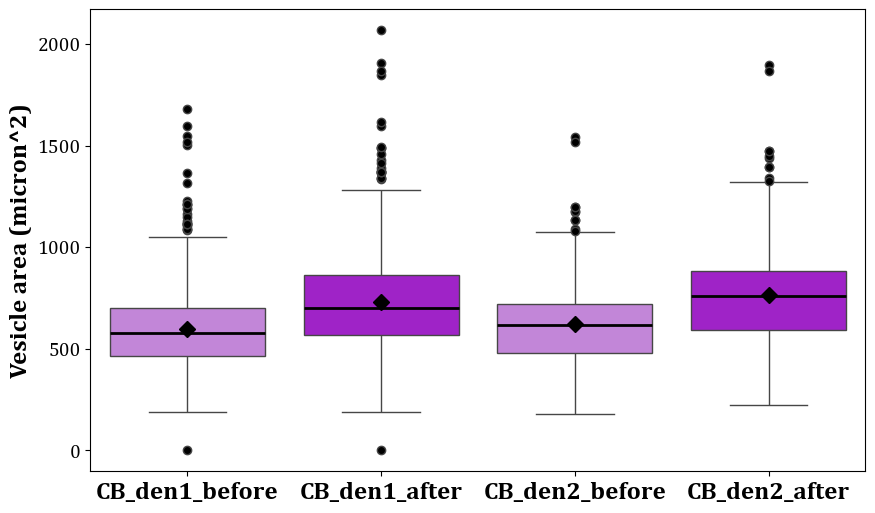

In [32]:
# Define properties for the boxplot
meanprops = dict(markerfacecolor='black', marker='D', markeredgecolor='black', markersize=8)
flierprops = dict(markerfacecolor='black', marker='o')
medianprops = dict(color='black', linewidth=2)
my_pal = {'CB_den1_before': '#C878E6', 'CB_den1_after': '#AD07E3', 'CB_den2_before': '#C878E6', 'CB_den2_after': '#AD07E3'}

# Create a figure and axis with seaborn
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create the boxplot grouped by 'dendrite_name_compr'
sns.boxplot(
    x='dendrite_name_compr',
    y='vesicle_area_micron^2',
    data=vesicle_df_stat_cleaned,
    palette=my_pal,
    flierprops=flierprops,
    showmeans=True,
    meanprops=meanprops,
    medianprops=medianprops,
    ax=ax  # Use the correct axis object
)

# Customize x-axis labels to show only the desired categories
desired_labels = ['CB_den1_before', 'CB_den1_after', 'CB_den2_before', 'CB_den2_after']
ax.set_xticks(range(len(desired_labels)))  # Set x-ticks to match the number of desired labels
ax.set_xticklabels(desired_labels, font='cambria', fontsize=18, fontweight='bold')

# Remove the x-axis title label
ax.set_xlabel('')  # Clear the x-axis label

# Customize y-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), font='cambria', fontsize=14)

# Add y-axis label
ax.set_ylabel('Vesicle area (micron^2)', fontsize=18, fontweight='bold', font='cambria')

plt.savefig('vesicle_area_boxplot.jpg', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_260\3352164280.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_260\3352164280.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), font='cambria', fontsize=14)


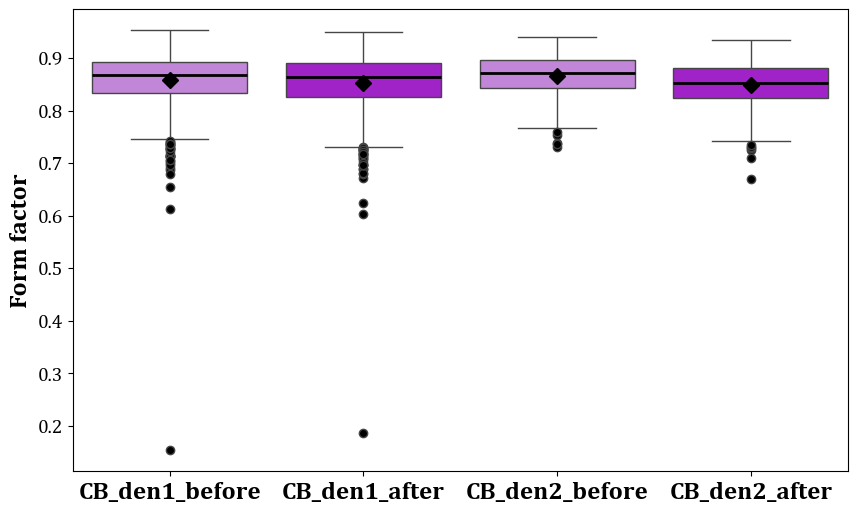

In [25]:
# Define properties for the boxplot
meanprops = dict(markerfacecolor='black', marker='D', markeredgecolor='black', markersize=8)
flierprops = dict(markerfacecolor='black', marker='o')
medianprops = dict(color='black', linewidth=2)
my_pal = {'CB_den1_before': '#C878E6', 'CB_den1_after': '#AD07E3', 'CB_den2_before': '#C878E6', 'CB_den2_after': '#AD07E3'}

# Create a figure and axis with seaborn
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create the boxplot grouped by 'dendrite_name_compr'
sns.boxplot(
    x='dendrite_name_compr',
    y='form_factor',
    data=vesicle_df_stat_cleaned,
    palette=my_pal,
    flierprops=flierprops,
    showmeans=True,
    meanprops=meanprops,
    medianprops=medianprops,
    ax=ax  
)

# Customize x-axis labels 
desired_labels = ['CB_den1_before', 'CB_den1_after', 'CB_den2_before', 'CB_den2_after']
ax.set_xticks(range(len(desired_labels)))  # Set x-ticks to match the number of desired labels
ax.set_xticklabels(desired_labels, font='cambria', fontsize=18, fontweight='bold')

# Remove the x-axis title label
ax.set_xlabel('')  

# Customize y-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), font='cambria', fontsize=14)

# Add y-axis label
ax.set_ylabel('Form factor', fontsize=18, fontweight='bold', font='cambria')

plt.savefig('form_factor.jpg', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_260\2035748748.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_260\2035748748.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), font='cambria', fontsize=14)


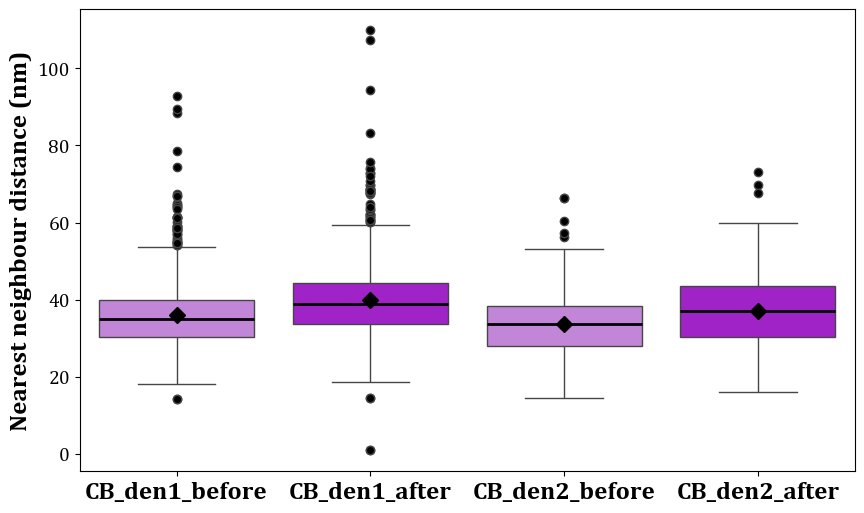

In [26]:
# Define properties for the boxplot
meanprops = dict(markerfacecolor='black', marker='D', markeredgecolor='black', markersize=8)
flierprops = dict(markerfacecolor='black', marker='o')
medianprops = dict(color='black', linewidth=2)
my_pal = {'CB_den1_before': '#C878E6', 'CB_den1_after': '#AD07E3', 'CB_den2_before': '#C878E6', 'CB_den2_after': '#AD07E3'}

# Create a figure and axis with seaborn
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create the boxplot grouped by 'dendrite_name_compr'
sns.boxplot(
    x='dendrite_name_compr',
    y='nearest_neighbour_distance',
    data=vesicle_df_stat_cleaned,
    palette=my_pal,
    flierprops=flierprops,
    showmeans=True,
    meanprops=meanprops,
    medianprops=medianprops,
    ax=ax  # Use the correct axis object
)

# Customize x-axis labels to show only the desired categories
desired_labels = ['CB_den1_before', 'CB_den1_after', 'CB_den2_before', 'CB_den2_after']
ax.set_xticks(range(len(desired_labels)))  # Set x-ticks to match the number of desired labels
ax.set_xticklabels(desired_labels, font='cambria', fontsize=18, fontweight='bold')

# Remove the x-axis title label
ax.set_xlabel('')  

# Customize y-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), font='cambria', fontsize=14)

# Add y-axis label
ax.set_ylabel('Nearest neighbour distance (nm)', fontsize=18, fontweight='bold', font='cambria')

plt.savefig('nearest_neighbour_distance.jpg', dpi=300, transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

In [36]:
# Perform the Shapiro-Wilk test for normality, Kurtosis, and Skewness

shapiro_columns = bouton_df_stat_cleaned[['surface_area_micron^2', 'volume_micron^3']]

stat_analysis = {}
for column in shapiro_columns.columns:
    shapiro_test = stats.shapiro(shapiro_columns[column])
    kurtosis_val = stats.kurtosis(shapiro_columns[column])
    skewness_val = stats.skew(shapiro_columns[column])
    
    stat_analysis[column] = {
        'Shapiro-Wilk Test Statistic': shapiro_test.statistic,
        'Shapiro-Wilk p-value': shapiro_test.pvalue,
        'Kurtosis': kurtosis_val,
        'Skewness': skewness_val
    }

# Convert the result into a DataFrame
stat_analysis_bouton_df = pd.DataFrame(stat_analysis).T

# Display the DataFrame
stat_analysis_bouton_df

,Shapiro-Wilk Test Statistic,Shapiro-Wilk p-value,Kurtosis,Skewness
surface_area_micron^2,0.919949,2.685788e-11,1.360173,1.144263
volume_micron^3,0.887389,9.211316e-14,2.531244,1.412027


In [37]:
# Another method for listing columns distributed non_normally.
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['surface_area_micron^2', 'volume_micron^3']


In [40]:
# Perform the Shapiro-Wilk test for normality, Kurtosis, and Skewness

shapiro_columns = synapse_df_stat_cleaned[['surface_area_micron^2', 'distance_from_soma_micron']]

stat_analysis = {}
for column in shapiro_columns.columns:
    shapiro_test = stats.shapiro(shapiro_columns[column])
    kurtosis_val = stats.kurtosis(shapiro_columns[column])
    skewness_val = stats.skew(shapiro_columns[column])
    
    stat_analysis[column] = {
        'Shapiro-Wilk Test Statistic': shapiro_test.statistic,
        'Shapiro-Wilk p-value': shapiro_test.pvalue,
        'Kurtosis': kurtosis_val,
        'Skewness': skewness_val
    }

# Convert the result into a DataFrame
stat_analysis_synapse_df = pd.DataFrame(stat_analysis).T

# Export the results to an HTML file
#stat_analysis_df.to_html('stat_analysis.html')

# Display the DataFrame
stat_analysis_synapse_df

,Shapiro-Wilk Test Statistic,Shapiro-Wilk p-value,Kurtosis,Skewness
surface_area_micron^2,0.920074,2.752427e-11,0.862328,1.062969
distance_from_soma_micron,0.965077,1.947261e-06,-0.647670,0.449859


In [41]:
# Another method for listing columns distributed non_normally.
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['surface_area_micron^2', 'distance_from_soma_micron']


In [43]:
# Perform the Shapiro-Wilk test for normality, Kurtosis, and Skewness

shapiro_columns = vesicle_df_stat_cleaned[['vesicle_area_micron^2', 'form_factor', 'nearest_neighbour_distance']]

stat_analysis = {}
for column in shapiro_columns.columns:
    shapiro_test = stats.shapiro(shapiro_columns[column])
    kurtosis_val = stats.kurtosis(shapiro_columns[column])
    skewness_val = stats.skew(shapiro_columns[column])
    
    stat_analysis[column] = {
        'Shapiro-Wilk Test Statistic': shapiro_test.statistic,
        'Shapiro-Wilk p-value': shapiro_test.pvalue,
        'Kurtosis': kurtosis_val,
        'Skewness': skewness_val
    }

# Convert the result into a DataFrame
stat_analysis_vesicle_df = pd.DataFrame(stat_analysis).T

# Display the DataFrame
stat_analysis_vesicle_df

,Shapiro-Wilk Test Statistic,Shapiro-Wilk p-value,Kurtosis,Skewness
vesicle_area_micron^2,0.949118,1.723015e-28,2.692477,1.073608
form_factor,0.867377,1.254582e-41,24.759422,-2.647790
nearest_neighbour_distance,0.941712,3.397139e-30,4.546938,1.175773


In [44]:
# Another method for listing columns distributed non_normally.
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['vesicle_area_micron^2', 'form_factor', 'nearest_neighbour_distance']


### Statistical analysis

In [46]:
# Bouton df Mann-Whitney U test

# Separate the groups
cb_den1_before = bouton_df_stat_cleaned[bouton_df_stat_cleaned['dendrite_name_compr'] == 'CB_den1_before']
cb_den1_after = bouton_df_stat_cleaned[bouton_df_stat_cleaned['dendrite_name_compr'] == 'CB_den1_after']
cb_den2_before = bouton_df_stat_cleaned[bouton_df_stat_cleaned['dendrite_name_compr'] == 'CB_den2_before']
cb_den2_after = bouton_df_stat_cleaned[bouton_df_stat_cleaned['dendrite_name_compr'] == 'CB_den2_after']

# Function to perform Mann-Whitney U test and print results
def mann_whitney_test(group1, group2, column_name):
    test_result = stats.mannwhitneyu(group1[column_name], group2[column_name], alternative='two-sided')
    print(f"Mann-Whitney U Test for {column_name}:")
    print(f"Group 1 vs Group 2 U statistic: {test_result.statistic}, p-value: {test_result.pvalue}\n")

# Perform the test for 'surface_area_micron^2'
print("Comparison: CB_den1_before vs. CB_den1_after")
mann_whitney_test(cb_den1_before, cb_den1_after, 'surface_area_micron^2')
mann_whitney_test(cb_den1_before, cb_den1_after, 'volume_micron^3')

print("Comparison: CB_den2_before vs. CB_den2_after")
mann_whitney_test(cb_den2_before, cb_den2_after, 'surface_area_micron^2')
mann_whitney_test(cb_den2_before, cb_den2_after, 'volume_micron^3')

Comparison: CB_den1_before vs. CB_den1_after
Mann-Whitney U Test for surface_area_micron^2:
Group 1 vs Group 2 U statistic: 5167.0, p-value: 0.1479307866294479

Mann-Whitney U Test for volume_micron^3:
Group 1 vs Group 2 U statistic: 4991.0, p-value: 0.06723488871103635

Comparison: CB_den2_before vs. CB_den2_after
Mann-Whitney U Test for surface_area_micron^2:
Group 1 vs Group 2 U statistic: 537.0, p-value: 0.2133218503263593

Mann-Whitney U Test for volume_micron^3:
Group 1 vs Group 2 U statistic: 532.0, p-value: 0.19332882103218263



In [52]:
# Synapse df Mann-Whitney U test

# Separate the groups
cb_den1_before = synapse_df_stat_cleaned[synapse_df_stat_cleaned['dendrite_name_compr'] == 'CB_den1_before']
cb_den1_after = synapse_df_stat_cleaned[synapse_df_stat_cleaned['dendrite_name_compr'] == 'CB_den1_after']
cb_den2_before = synapse_df_stat_cleaned[synapse_df_stat_cleaned['dendrite_name_compr'] == 'CB_den2_before']
cb_den2_after = synapse_df_stat_cleaned[synapse_df_stat_cleaned['dendrite_name_compr'] == 'CB_den2_after']

# Function to perform Mann-Whitney U test and print results
def mann_whitney_test(group1, group2, column_name):
    test_result = stats.mannwhitneyu(group1[column_name], group2[column_name], alternative='two-sided')
    print(f"Mann-Whitney U Test for {column_name}:")
    print(f"Group 1 vs Group 2 U statistic: {test_result.statistic}, p-value: {test_result.pvalue}\n")

print("Comparison: CB_den1_before vs. CB_den1_after")
mann_whitney_test(cb_den1_before, cb_den1_after, 'surface_area_micron^2')
mann_whitney_test(cb_den1_before, cb_den1_after, 'distance_from_soma_micron')

print("Comparison: CB_den2_before vs. CB_den2_after")
mann_whitney_test(cb_den2_before, cb_den2_after, 'surface_area_micron^2')
mann_whitney_test(cb_den2_before, cb_den2_after, 'distance_from_soma_micron')

Comparison: CB_den1_before vs. CB_den1_after
Mann-Whitney U Test for surface_area_micron^2:
Group 1 vs Group 2 U statistic: 5597.0, p-value: 0.6096319686688123

Mann-Whitney U Test for distance_from_soma_micron:
Group 1 vs Group 2 U statistic: 4083.0, p-value: 0.0001405642914087126

Comparison: CB_den2_before vs. CB_den2_after
Mann-Whitney U Test for surface_area_micron^2:
Group 1 vs Group 2 U statistic: 598.0, p-value: 0.5771972405902599

Mann-Whitney U Test for distance_from_soma_micron:
Group 1 vs Group 2 U statistic: 511.0, p-value: 0.12421924078970249



In [54]:
# Vesicle df: Removing outliers

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataframe to exclude outliers
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# List of columns to remove outliers from
columns_to_check = ['vesicle_area_micron^2', 'form_factor', 'nearest_neighbour_distance']

# Apply the function to remove outliers from each column
for column in columns_to_check:
    vesicle_df_stat_cleaned = remove_outliers_iqr(vesicle_df_stat_cleaned, column)

# Display the cleaned dataframe
vesicle_df_stat_cleaned.head()

,dendrite_name_compr,bouton_number,synapse_type,vesicle_area_micron^2,form_factor,nearest_neighbour_distance
0,CB_den1_before,b1_1,as1,531.563,0.8955,42.3608
1,CB_den1_before,b1_2,as1,558.238,0.9406,48.1007
2,CB_den1_before,b1_3,as1,359.915,0.9299,32.5613
3,CB_den1_before,b1_4,as1,422.213,0.8367,40.5188
4,CB_den1_before,b1_5,as1,395.002,0.8167,40.5188


In [55]:
# Vesicle df Mann-Whitney U test

# Separate the groups
cb_den1_before = vesicle_df_stat_cleaned[vesicle_df_stat_cleaned['dendrite_name_compr'] == 'CB_den1_before']
cb_den1_after = vesicle_df_stat_cleaned[vesicle_df_stat_cleaned['dendrite_name_compr'] == 'CB_den1_after']
cb_den2_before = vesicle_df_stat_cleaned[vesicle_df_stat_cleaned['dendrite_name_compr'] == 'CB_den2_before']
cb_den2_after = vesicle_df_stat_cleaned[vesicle_df_stat_cleaned['dendrite_name_compr'] == 'CB_den2_after']

# Function to perform Mann-Whitney U test and print results
def mann_whitney_test(group1, group2, column_name):
    test_result = stats.mannwhitneyu(group1[column_name], group2[column_name], alternative='two-sided')
    print(f"Mann-Whitney U Test for {column_name}:")
    print(f"Group 1 vs Group 2 U statistic: {test_result.statistic}, p-value: {test_result.pvalue}\n")

print("Comparison: CB_den1_before vs. CB_den1_after")
mann_whitney_test(cb_den1_before, cb_den1_after, 'vesicle_area_micron^2')
mann_whitney_test(cb_den1_before, cb_den1_after, 'form_factor')
mann_whitney_test(cb_den1_before, cb_den1_after, 'nearest_neighbour_distance')

print("Comparison: CB_den2_before vs. CB_den2_after")
mann_whitney_test(cb_den2_before, cb_den2_after, 'vesicle_area_micron^2')
mann_whitney_test(cb_den2_before, cb_den2_after, 'form_factor')
mann_whitney_test(cb_den2_before, cb_den2_after, 'nearest_neighbour_distance')

Comparison: CB_den1_before vs. CB_den1_after
Mann-Whitney U Test for vesicle_area_micron^2:
Group 1 vs Group 2 U statistic: 230238.5, p-value: 5.665342402761894e-35

Mann-Whitney U Test for form_factor:
Group 1 vs Group 2 U statistic: 373603.0, p-value: 0.03803398474759792

Mann-Whitney U Test for nearest_neighbour_distance:
Group 1 vs Group 2 U statistic: 259350.0, p-value: 4.901888398121175e-21

Comparison: CB_den2_before vs. CB_den2_after
Mann-Whitney U Test for vesicle_area_micron^2:
Group 1 vs Group 2 U statistic: 29314.0, p-value: 3.5876354225166217e-12

Mann-Whitney U Test for form_factor:
Group 1 vs Group 2 U statistic: 54348.0, p-value: 3.7272286584063873e-07

Mann-Whitney U Test for nearest_neighbour_distance:
Group 1 vs Group 2 U statistic: 33840.0, p-value: 1.7826284520898987e-06

